In [8]:
import numpy as np
import matplotlib.pyplot as plt

### Plot the loss plots (chi2)

In [15]:
a = np.load("mouse586468_sweep0_param25_J_2000iters.npy")
b = np.load("mouse586468_sweep1_param25_J_2000iters.npy")
#c = np.load("beforesweep2_matrix_2000iters_screen.npy")

In [11]:
plt.clf()

<Figure size 640x480 with 0 Axes>

Text(0.5, 1.0, 'Chi2s v/s Epochs, Mouse 599975')

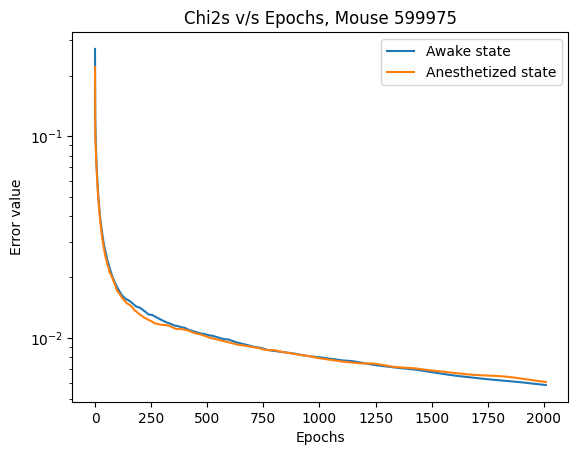

In [12]:
loss_0 = np.load("mouse_599975/mouse599975_sweep0_param50_chi2s_2000iters.npy")#("beforesweep0_pvars_2000iters_screen.npy")#[:500]
loss_1 = np.load("mouse_599975/mouse599975_sweep1_param50_chi2s_2000iters.npy") #("beforesweep1_pvars_2000iters_screen.npy")#[:500]
#loss_2 = np.load("mouse_599975/mouse599975_sweep0_param70_chi2s_2000iters.npy")
#loss_3 = np.load("mouse_599975/mouse599975_sweep0_paramwhite_chi2s_2000iters.npy")

plt.clf()
plt.plot(loss_0)
plt.plot(loss_1)
#plt.plot(loss_2)
#plt.plot(loss_3)
plt.ylabel("Error value")
plt.xlabel("Epochs")
plt.legend(["Awake state", "Anesthetized state"])
#plt.legend(["Sweep 0", "Sweep 1", "Sweep 2", "Sweep 3"])
plt.yscale("log")
plt.title("Chi2s v/s Epochs, Mouse 599975")

### Plot the interaction matrix by clubbing neurons based on peak channels

In [20]:
neurons_order = np.load("mouse586468_final_allprobes_peakchannel.npy")

In [72]:
a = np.load("mouse586468_sweep0_paramwhite_J_2000iters.npy")
b = np.load("mouse586468_sweep2_param45_J_2000iters.npy")

In [59]:
num_neurons = len(neurons_order)

In [60]:
len(neurons_order)

2129

In [61]:
mat_0 = np.zeros((num_neurons, num_neurons))

for i in range(len(a)):
    for j in range(len(b)):
        mat_0[i, j] = a[neurons_order[i], neurons_order[j]]
        
mat_1 = np.zeros((num_neurons, num_neurons))

for i in range(len(a)):
    for j in range(len(b)):
        mat_1[i, j] = b[neurons_order[i], neurons_order[j]]

In [62]:
avg_neuron = 32

In [63]:
avg_mat_dim = num_neurons//avg_neuron

In [64]:
avg_mat_dim

66

In [65]:
avg_mat_0 = np.zeros((avg_mat_dim, avg_mat_dim))
for i in range(avg_mat_dim):
    for j in range(avg_mat_dim):
        avg_mat_0[i, j] = np.mean(mat_0[avg_neuron*i:avg_neuron*(i+1), avg_neuron*j:avg_neuron*(j+1)])
        
avg_mat_1 = np.zeros((avg_mat_dim, avg_mat_dim))
for i in range(avg_mat_dim):
    for j in range(avg_mat_dim):
        avg_mat_1[i, j] = np.mean(mat_1[avg_neuron*i:avg_neuron*(i+1), avg_neuron*j:avg_neuron*(j+1)])

Text(0.5, 0.98, 'Interaction Matrices, Parameter=25')

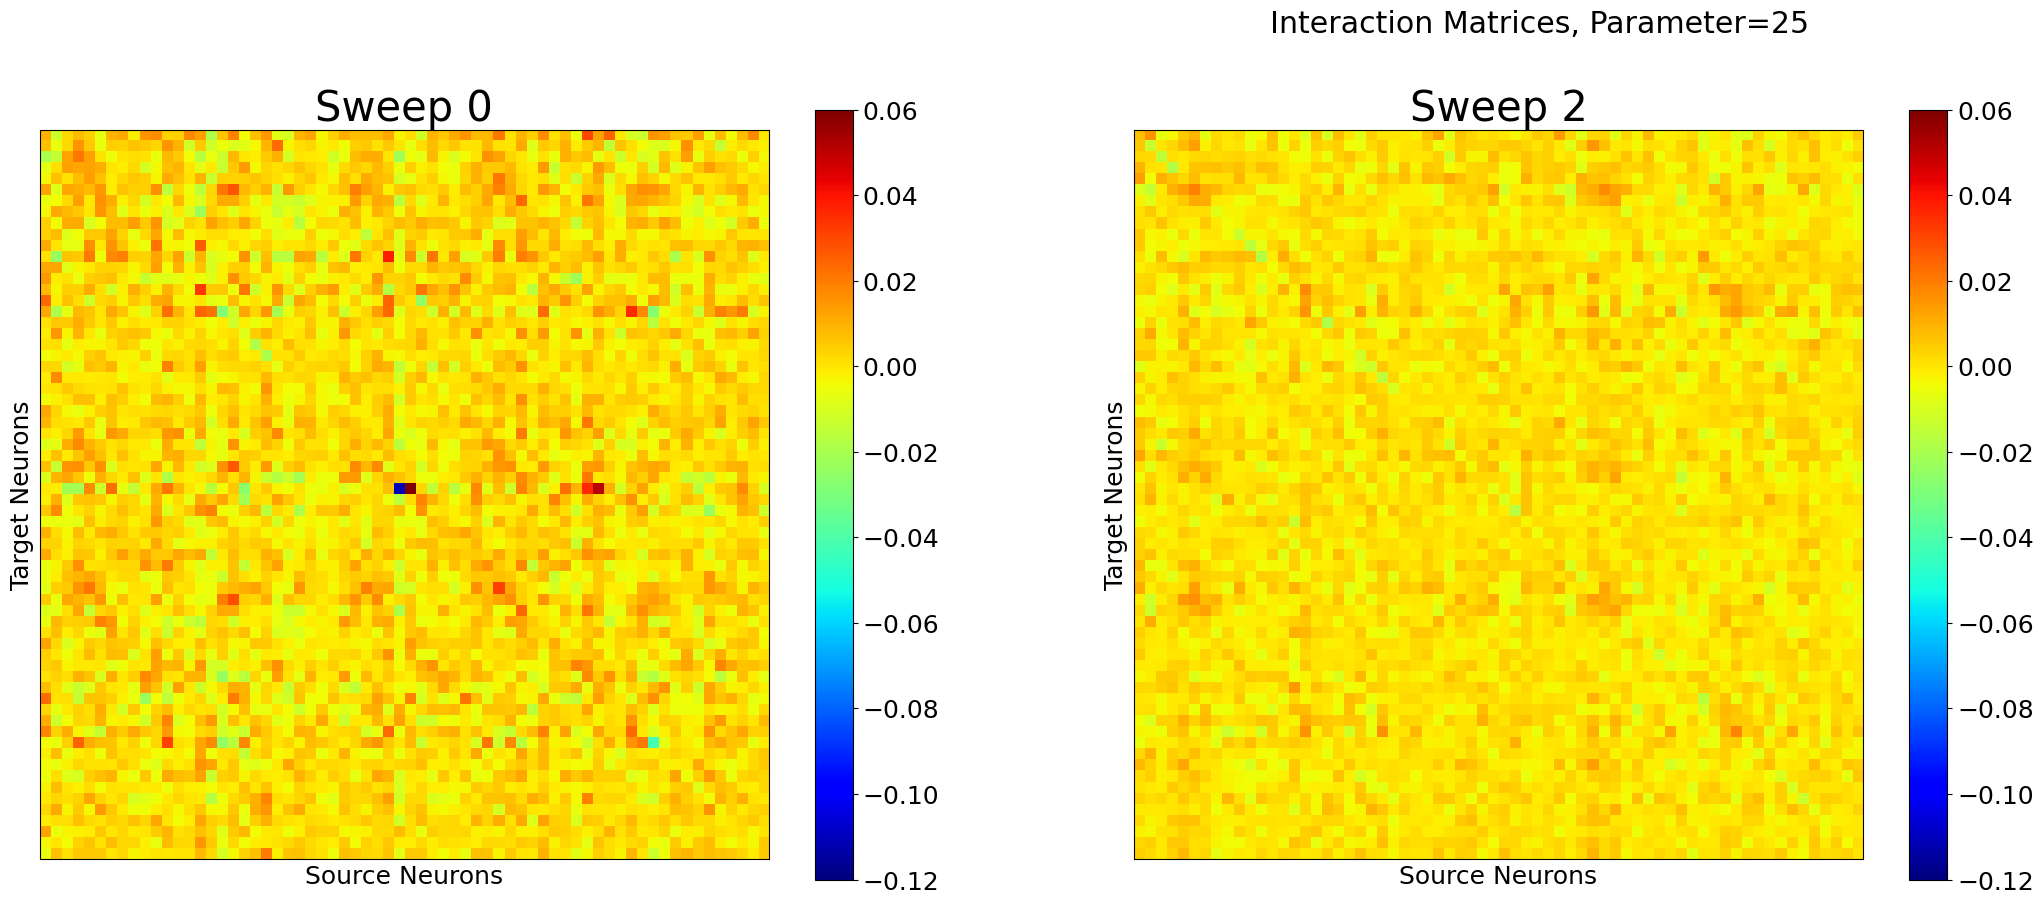

In [68]:
plt.figure(figsize=(40,10))
plt.rcParams.update({'font.size': 18})

plt.subplot(1, 3, 1)
plt.imshow(avg_mat_0, cmap="jet")
plt.colorbar()
plt.clim(-0.12, 0.06)
#plt.clim(-0.10, 0.05)
#plt.clim(-0.32, 0.27)
#plt.clim(-0.4, 0.21)
#plt.clim(-0.042, 0.035)
#plt.title("Awake state", fontsize=40)
plt.title("Sweep 0", fontsize=30)
plt.xticks([]), plt.yticks([])
plt.xlabel("Source Neurons"), plt.ylabel("Target Neurons")

plt.subplot(1, 3, 2)
plt.imshow(avg_mat_1, cmap="jet")
plt.colorbar()
plt.clim(-0.12, 0.06)
#plt.clim(-0.05, 0.04)
#plt.clim(-0.10, 0.05)
#plt.clim(-0.32, 0.27)
#plt.clim(-0.4, 0.21)
#plt.clim(-0.042, 0.035)
#plt.title("Anesthetized state", fontsize=40)
plt.title("Sweep 2", fontsize=30)
plt.xticks([]), plt.yticks([])
plt.xlabel("Source Neurons"), plt.ylabel("Target Neurons")

plt.suptitle("Interaction Matrices, Parameter=25")
#plt.savefig("interaction_matrices_mouse599975_paramwhite.png")

In [69]:
diff_01 = avg_mat_0-avg_mat_1

In [70]:
np.save("mouse586468_diffmatrix_param45_peakchannels.npy", diff_01)

Text(0.5, 0.98, 'Difference in Interaction Matrices')

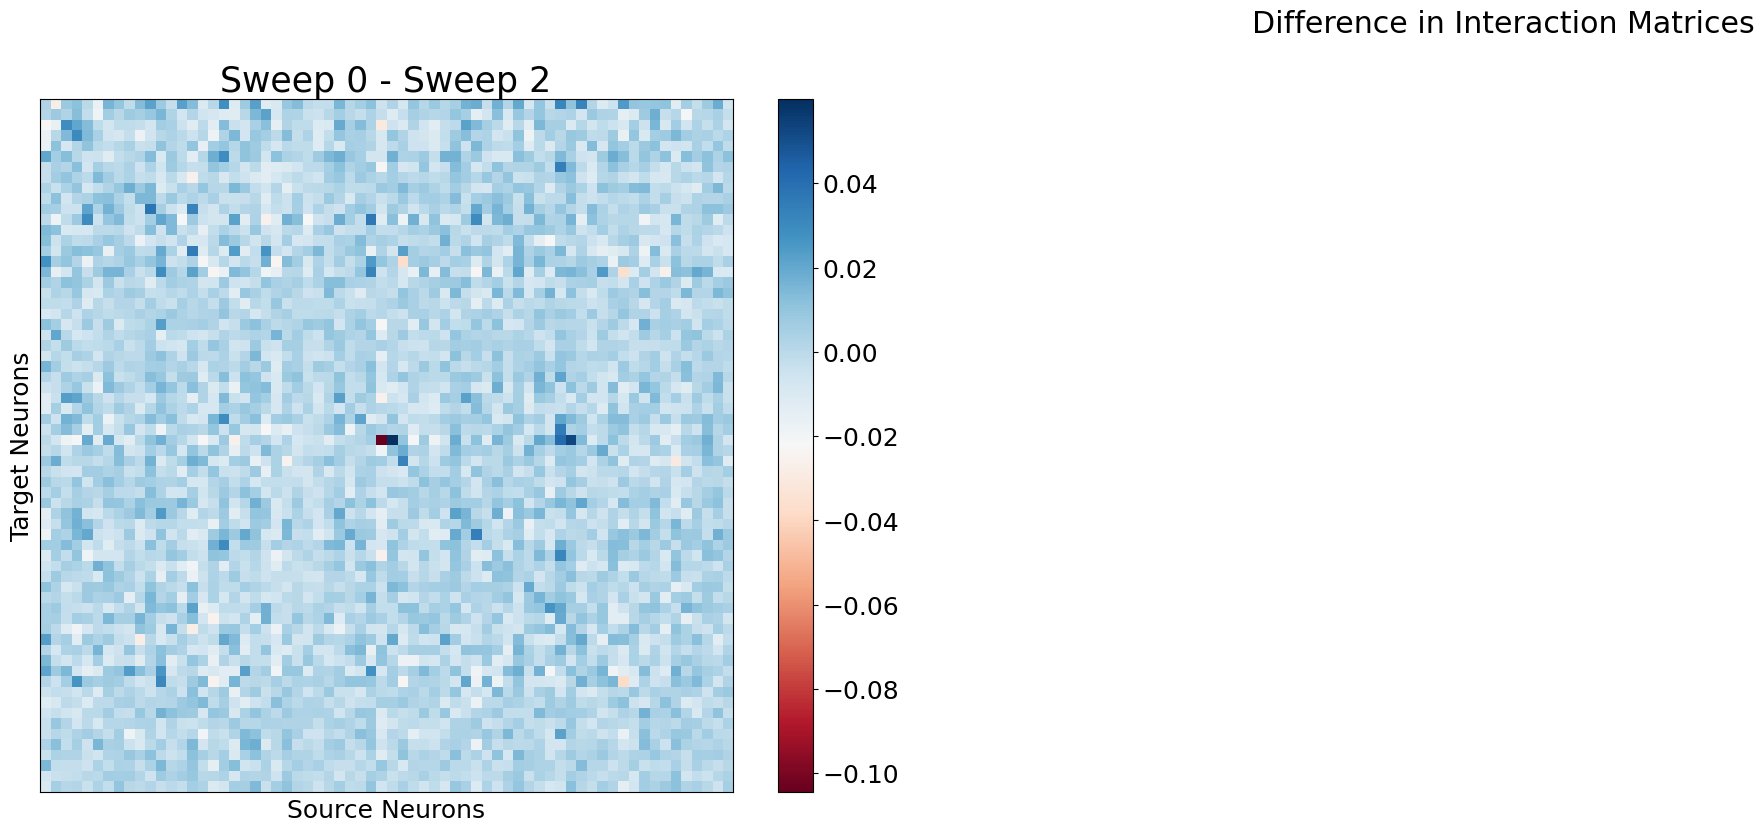

In [71]:
plt.figure(figsize=(40, 9))
plt.rcParams.update({'font.size': 18})

plt.subplot(1, 3, 1)
plt.imshow(diff_01, cmap="RdBu")
plt.colorbar()
#plt.clim(-0.045, 0.02)
#plt.clim(-0.06, 0.02)
#plt.clim(-0.045, 0.02)
#plt.clim(-0.09, 0.105)
#plt.clim(-0.04, 0.02)
#plt.title("Awake state - Anesthetized state", fontsize=25)
plt.title("Sweep 0 - Sweep 2", fontsize=25)
plt.xticks([]), plt.yticks([])
plt.xlabel("Source Neurons"), plt.ylabel("Target Neurons")


plt.suptitle("Difference in Interaction Matrices")
#plt.savefig("diff_interaction_matrices_mouse599975_paramwhite.png")

### Plot the interaction matrix by clubbing neurons based on regions

In [2]:
areas = np.load("mouse586468_final_allprobes_area.npy")

In [3]:
s = set(areas)

In [4]:
ind_areas = {}
all_indices = []

In [5]:
for y in sorted(s):
    indices = [i for i, x in enumerate(areas) if x == y]
    ind_areas[y] = indices
    all_indices.extend(indices)

In [6]:
num_neurons = len(all_indices)

In [44]:
a = np.load("mouse586468_sweep0_paramwhite_J_2000iters.npy")
b = np.load("mouse586468_sweep1_paramwhite_J_2000iters.npy")
c = np.load("mouse586468_sweep2_param45_J_2000iters.npy")
d = np.load("mouse586468_sweep3_param45_J_2000iters.npy")

In [45]:
mat_0 = np.zeros((num_neurons, num_neurons))

for i in range(len(a)):
    for j in range(len(b)):
        #print(all_indices[i])
        mat_0[i, j] = a[all_indices[i], all_indices[j]]
        
mat_1 = np.zeros((num_neurons, num_neurons))

for i in range(len(a)):
    for j in range(len(b)):
        mat_1[i, j] = b[all_indices[i], all_indices[j]]
        
mat_2 = np.zeros((num_neurons, num_neurons))

for i in range(len(a)):
    for j in range(len(b)):
        mat_2[i, j] = c[all_indices[i], all_indices[j]]
        
mat_3 = np.zeros((num_neurons, num_neurons))

for i in range(len(a)):
    for j in range(len(b)):
        mat_3[i, j] = d[all_indices[i], all_indices[j]]

In [46]:
avg_mat_dim = len(sorted(s))

start = 0
areas_sorted = sorted(s)
avg_mat_0 = np.zeros((avg_mat_dim, avg_mat_dim))

start_x = 0
for i in range(avg_mat_dim):
    len_area_x = len(ind_areas[areas_sorted[i]])
    start_y = 0
    for j in range(avg_mat_dim):
        len_area_y = len(ind_areas[areas_sorted[j]])
        avg_mat_0[i, j] = np.mean(mat_0[start_x:start_x+len_area_x, start_y:start_y+len_area_y])
        start_y += len_area_y
    start_x += len_area_x

In [47]:
avg_mat_dim = len(sorted(s))

start = 0
areas_sorted = sorted(s)
avg_mat_1 = np.zeros((avg_mat_dim, avg_mat_dim))

start_x = 0
for i in range(avg_mat_dim):
    len_area_x = len(ind_areas[areas_sorted[i]])
    start_y = 0
    for j in range(avg_mat_dim):
        len_area_y = len(ind_areas[areas_sorted[j]])
        avg_mat_1[i, j] = np.mean(mat_1[start_x:start_x+len_area_x, start_y:start_y+len_area_y])
        start_y += len_area_y
    start_x += len_area_x

In [48]:
avg_mat_dim = len(sorted(s))

start = 0
areas_sorted = sorted(s)
avg_mat_2 = np.zeros((avg_mat_dim, avg_mat_dim))

start_x = 0
for i in range(avg_mat_dim):
    len_area_x = len(ind_areas[areas_sorted[i]])
    start_y = 0
    for j in range(avg_mat_dim):
        len_area_y = len(ind_areas[areas_sorted[j]])
        avg_mat_2[i, j] = np.mean(mat_2[start_x:start_x+len_area_x, start_y:start_y+len_area_y])
        start_y += len_area_y
    start_x += len_area_x

In [49]:
avg_mat_dim = len(sorted(s))

start = 0
areas_sorted = sorted(s)
avg_mat_3 = np.zeros((avg_mat_dim, avg_mat_dim))

start_x = 0
for i in range(avg_mat_dim):
    len_area_x = len(ind_areas[areas_sorted[i]])
    start_y = 0
    for j in range(avg_mat_dim):
        len_area_y = len(ind_areas[areas_sorted[j]])
        avg_mat_3[i, j] = np.mean(mat_3[start_x:start_x+len_area_x, start_y:start_y+len_area_y])
        start_y += len_area_y
    start_x += len_area_x

In [50]:
diff_01 = avg_mat_0-avg_mat_1
diff_23 = avg_mat_2-avg_mat_3
diff_02 = avg_mat_0-avg_mat_2

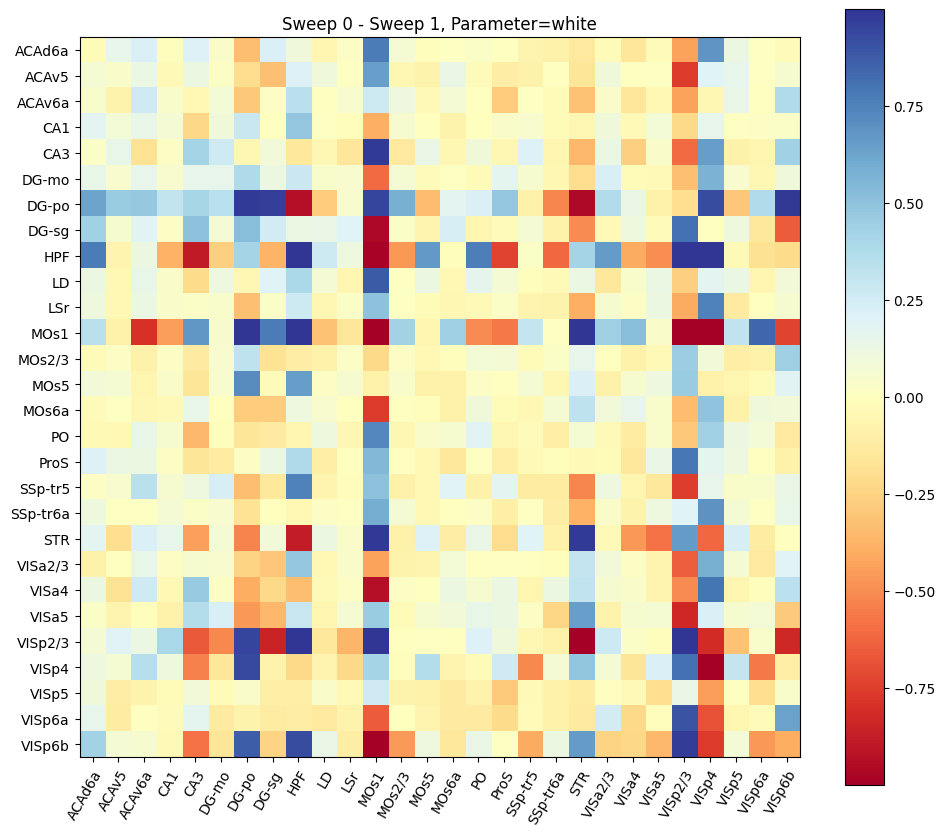

In [51]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 10)
im = ax.imshow(np.tanh(diff_01/0.01)[:28, :28], cmap="RdYlBu")
cbar = ax.figure.colorbar(im, ax=ax, shrink=0.8)
#cbar.ax.set_ylim(0, 0.1)
#ax.colorbar()
#ax.figure.colorbar.ColorbarBase.set_clim(0, 0,10)

# Show all ticks and label them with the respective list entries
ax.set_xticks(np.arange(28))
ax.set_yticks(np.arange(28))
ax.set_xticklabels(areas_sorted[:28], fontdict={'fontsize':10})
ax.set_yticklabels(areas_sorted[:28], fontdict={'fontsize':10})

#Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=60, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
#for i in range(len(areas_sorted)):
#    for j in range(len(areas_sorted)):
#        text = ax.text(j, i, avg_mat_0[i, j],
#                       ha="center", va="center", color="w")

ax.set_title("Sweep 0 - Sweep 1, Parameter=white")
fig.tight_layout()
plt.show()